In [1]:
import boto3
import csv
import re
import os
region='us-east-1'
with open("shar_accessKeys.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        accesskey=line[0]
        secretkey=line[1]
photo='dataset/korf1.jpg'
client=boto3.client('rekognition',aws_access_key_id=accesskey,aws_secret_access_key=secretkey,region_name=region)
#client=boto3.client('rekognition')


In [2]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listofscb=[]
listfscb=[]
listmscb=[]
y=-1
j=-1
cor=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)

for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        #im = Image.open(z)
        j=j+1
        i=-1
        
        listofbris=[]
        #enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers1=[0.025,0.05,0.25,0.5,1.0,5.0,10,20.0,30]
        numbers2=[0.5,1.0,2.0,5.0,10,20.0,40,60,100,200,300]
        numbers3=[0.5,1.0,2.0,5.0,10,20.0,40,60,100,200,300]
        for x in numbers3:
            im = Image.open(z)
            enhancer = ImageEnhance.Sharpness(im)
            i=i+1
            
            im_output = enhancer.enhance(x)
            im_output.save('change6.png')
           
            for y in numbers2:
                
                
                
                im = Image.open('change6.png')
                enhancer = ImageEnhance.Contrast(im)
                im_output = enhancer.enhance(y)
                im_output.save('gaus6.png')
                for za in numbers1:
                    dict={}
                    l1=[]
                    factorset=[]
                    factorset.append(x)
                    factorset.append(y)
                    factorset.append(za)
                    tup1=tuple(factorset)

                    im = Image.open('gaus6.png')
                    enhancer = ImageEnhance.Brightness(im)
                    im_output = enhancer.enhance(y)
                    im_output.save('change6.png')
                    with open('change6.png', "rb") as source_image:
                        image=source_image.read()
                        response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])

                        for key,value in response.items():
                            if key=='FaceDetails':
                                for k in value:
                                    for ke,val in k.items():
                                        if ke=='Gender':
                                            for key1,val1 in val.items():
                                                if key1=='Value':
                                                    if val1==genlist[0]:
                                                        l1.append('0')
                                                    else:
                                                        l1.append('1')

                                                else:
                                                    l1.append(val1)

                                                    dict[tup1]=l1
                                                    


                    listofbris.append(dict)
            if genlist[j]=='Female':
               
                listfscb.append(listofbris)
            else:
                
                listmscb.append(listofbris)                                        

            listofscb.append(listofbris)


In [3]:
for li in listmscb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval[0]=='1':
                dictionval[1]=100-dictionval[1]

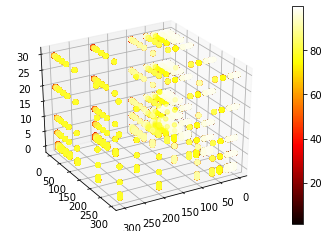

In [12]:
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
l1=[]
l2=[]
l3=[]
l4=[]
ax = plt.axes(projection='3d')
for li in listmscb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            l1.append(dictionkey[0])
            l2.append(dictionkey[1])
            l3.append(dictionkey[2])
            l4.append(dictionval[1])
    

#ax.scatter3D(l1, l2, l3, 'gray')
#ax.plot(l1, l2, l3, 'gray')
img = ax.scatter(l1, l2, l3, c=l4, cmap=plt.hot())
fig.colorbar(img)
ax.view_init(30, 60)
plt.show()

In [5]:
for li in listfscb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval[0]=='1':
                dictionval[1]=100-dictionval[1]

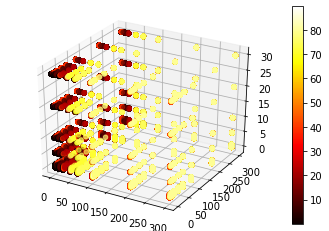

In [6]:
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
l1=[]
l2=[]
l3=[]
l4=[]
ax = plt.axes(projection='3d')
for li in listfscb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            l1.append(dictionkey[0])
            l2.append(dictionkey[1])
            l3.append(dictionkey[2])
            l4.append(dictionval[1])
    

#ax.scatter3D(l1, l2, l3, 'gray')
#ax.plot(l1, l2, l3, 'gray')
img = ax.scatter(l1, l2, l3, c=l4, cmap=plt.hot())
fig.colorbar(img)
plt.show()